In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [7]:
import requests
requests.__version__

'2.25.1'

In [8]:
# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | segou
Processing Record 2 of Set 1 | prince rupert
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | nyurba
Processing Record 6 of Set 1 | lokosovo
Processing Record 7 of Set 1 | machilipatnam
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | cherskiy
Processing Record 10 of Set 1 | lamu
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | west point
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | mudigere
Processing Record 16 of Set 1 | coihueco
Processing Record 17 of Set 1 | tabriz
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | sao joao da barra
Processing Record 20 of Set 1 | zhob
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | quba
Processing Record 23 of Set 1 | faanui
Processin

Processing Record 38 of Set 4 | camabatela
Processing Record 39 of Set 4 | natal
Processing Record 40 of Set 4 | erenhot
Processing Record 41 of Set 4 | filadelfia
Processing Record 42 of Set 4 | menongue
Processing Record 43 of Set 4 | inhambane
Processing Record 44 of Set 4 | marcona
City not found. Skipping...
Processing Record 45 of Set 4 | gulshat
City not found. Skipping...
Processing Record 46 of Set 4 | nikolskoye
Processing Record 47 of Set 4 | saravena
Processing Record 48 of Set 4 | ozernovskiy
Processing Record 49 of Set 4 | luxor
Processing Record 50 of Set 4 | longyearbyen
Processing Record 1 of Set 5 | sfantu gheorghe
Processing Record 2 of Set 5 | ovruch
Processing Record 3 of Set 5 | inuvik
Processing Record 4 of Set 5 | maimon
City not found. Skipping...
Processing Record 5 of Set 5 | beeville
Processing Record 6 of Set 5 | mackay
Processing Record 7 of Set 5 | krasnoturansk
Processing Record 8 of Set 5 | bonthe
Processing Record 9 of Set 5 | shingu
Processing Record 

Processing Record 32 of Set 8 | pochutla
Processing Record 33 of Set 8 | lavrentiya
Processing Record 34 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 35 of Set 8 | beni mazar
Processing Record 36 of Set 8 | broome
Processing Record 37 of Set 8 | severo-yeniseyskiy
Processing Record 38 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 39 of Set 8 | vastervik
City not found. Skipping...
Processing Record 40 of Set 8 | ozgon
City not found. Skipping...
Processing Record 41 of Set 8 | bandarbeyla
Processing Record 42 of Set 8 | hit
Processing Record 43 of Set 8 | villa carlos paz
Processing Record 44 of Set 8 | caluquembe
Processing Record 45 of Set 8 | wilmington island
Processing Record 46 of Set 8 | mabaruma
Processing Record 47 of Set 8 | trenggalek
Processing Record 48 of Set 8 | freeport
Processing Record 49 of Set 8 | jiroft
City not found. Skipping...
Processing Record 50 of Set 8 | kodinsk
Processing Record 1 of Set 9 | louis

Processing Record 13 of Set 12 | warqla
City not found. Skipping...
Processing Record 14 of Set 12 | asosa
Processing Record 15 of Set 12 | gladstone
Processing Record 16 of Set 12 | puerto narino
Processing Record 17 of Set 12 | wanning
Processing Record 18 of Set 12 | arman
Processing Record 19 of Set 12 | rancho palos verdes
Processing Record 20 of Set 12 | panlaitan
Processing Record 21 of Set 12 | raga
Processing Record 22 of Set 12 | paredon
Processing Record 23 of Set 12 | tapah
Processing Record 24 of Set 12 | amuntai
Processing Record 25 of Set 12 | bar harbor
Processing Record 26 of Set 12 | moussoro
Processing Record 27 of Set 12 | xapuri
Processing Record 28 of Set 12 | novo aripuana
Processing Record 29 of Set 12 | sao filipe
Processing Record 30 of Set 12 | atambua
Processing Record 31 of Set 12 | hualmay
Processing Record 32 of Set 12 | yagodnoye
Processing Record 33 of Set 12 | garachine
Processing Record 34 of Set 12 | socorro
Processing Record 35 of Set 12 | san pedro

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Segou,13.4317,-6.2157,83.73,61,100,10.47,ML,2021-08-01 19:14:54
1,Prince Rupert,54.3161,-130.3201,59.09,88,90,4.61,CA,2021-08-01 19:14:54
2,Mar Del Plata,-38.0023,-57.5575,54.09,29,20,3.00,AR,2021-08-01 19:14:55
3,Vaini,-21.2000,-175.2000,68.16,94,40,13.80,TO,2021-08-01 19:14:55
4,Nyurba,63.2842,118.3319,59.43,61,100,4.99,RU,2021-08-01 19:14:56
5,Lokosovo,61.1333,74.8167,59.05,73,100,6.78,RU,2021-08-01 19:14:56
6,Machilipatnam,16.1667,81.1333,85.89,57,99,10.47,IN,2021-08-01 19:14:57
7,Mataura,-46.1927,168.8643,39.47,98,64,3.74,NZ,2021-08-01 19:14:57
8,Cherskiy,68.7500,161.3000,35.17,90,96,18.48,RU,2021-08-01 19:14:57
9,Lamu,-2.2717,40.9020,76.37,78,52,17.74,KE,2021-08-01 19:14:57


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_new_df=city_data_df[new_column_order]
city_data_new_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Segou,ML,2021-08-01 19:14:54,13.4317,-6.2157,83.73,61,100,10.47
1,Prince Rupert,CA,2021-08-01 19:14:54,54.3161,-130.3201,59.09,88,90,4.61
2,Mar Del Plata,AR,2021-08-01 19:14:55,-38.0023,-57.5575,54.09,29,20,3.00
3,Vaini,TO,2021-08-01 19:14:55,-21.2000,-175.2000,68.16,94,40,13.80
4,Nyurba,RU,2021-08-01 19:14:56,63.2842,118.3319,59.43,61,100,4.99
5,Lokosovo,RU,2021-08-01 19:14:56,61.1333,74.8167,59.05,73,100,6.78
6,Machilipatnam,IN,2021-08-01 19:14:57,16.1667,81.1333,85.89,57,99,10.47
7,Mataura,NZ,2021-08-01 19:14:57,-46.1927,168.8643,39.47,98,64,3.74
8,Cherskiy,RU,2021-08-01 19:14:57,68.7500,161.3000,35.17,90,96,18.48
9,Lamu,KE,2021-08-01 19:14:57,-2.2717,40.9020,76.37,78,52,17.74


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_new_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

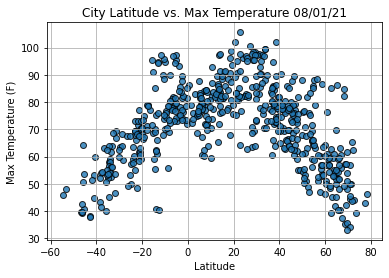

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

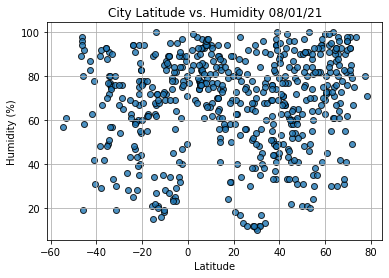

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

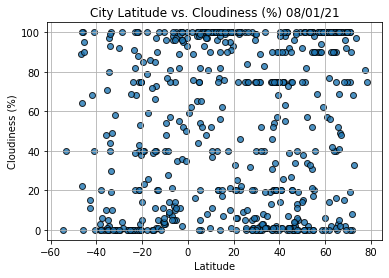

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

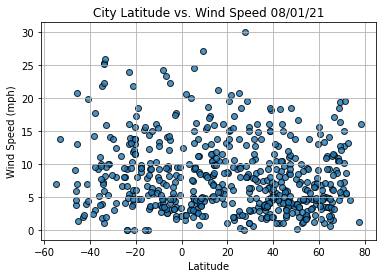

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()